In [2]:
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense,Input

from keras.datasets import mnist

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
def display(array1, array2):
    """
    Displays ten random images from each one of the supplied arrays.
    """

    n = 10

    indices = np.random.randint(len(array1), size=n)
    images1 = array1[indices, :]
    images2 = array2[indices, :]

    plt.figure(figsize=(20, 4))
    for i, (image1, image2) in enumerate(zip(images1, images2)):
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(image1.reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(image2.reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

    plt.show()

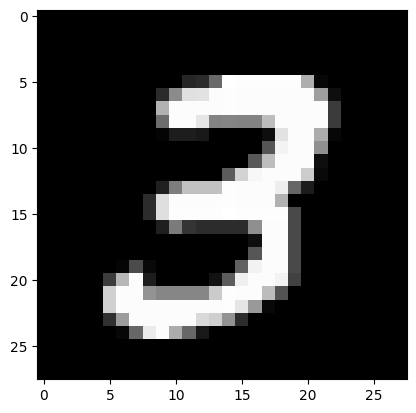

In [5]:
plt.imshow(x_train[7], cmap="gray")

In [6]:
x_test.shape

(10000, 28, 28)

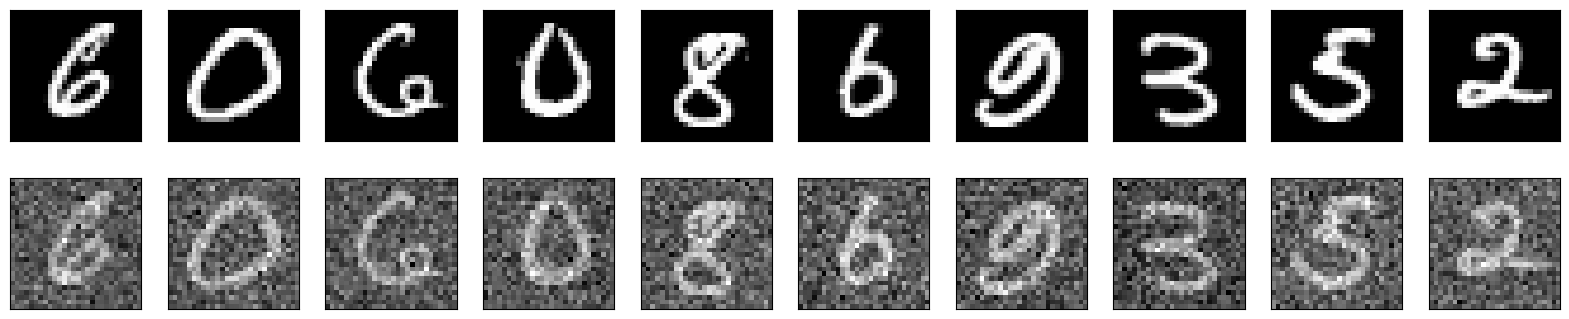

In [7]:
# Normalize images 
X_train = x_train.reshape((-1, 784))/255
X_test = x_test.reshape((-1, 784))/255

# add noise 
noise_factor = 0.3
noisy_X_train = X_train + noise_factor * np.random.normal(
    loc=0.0, scale=1.0, size=X_train.shape
)
np.clip(noisy_X_train, 0.0, 1.0)

noisy_X_test = X_test + noise_factor * np.random.normal(
    loc=0.0, scale=1.0, size=X_test.shape
)
np.clip(noisy_X_test, 0.0, 1.0)

display(X_train, noisy_X_train)


In [11]:
model=Sequential()

# input layer
model.add(Input(shape=(784,)))

# encoder layer
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))

# bottleneck layer
model.add(Dense(32, activation='relu'))

# decoder layer
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))

# output layer
model.add(Dense(784, activation='sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 256)               200960    
                                                                 
 dense_7 (Dense)             (None, 128)               32896     
                                                                 
 dense_8 (Dense)             (None, 32)                4128      
                                                                 
 dense_9 (Dense)             (None, 128)               4224      
                                                                 
 dense_10 (Dense)            (None, 256)               33024     
                                                                 
 dense_11 (Dense)            (None, 784)               201488    
                                                                 
Total params: 476,720
Trainable params: 476,720
Non-tr

In [12]:
model.compile(loss='BinaryCrossentropy', optimizer='Adam')

In [13]:
result=model.fit(noisy_X_train, X_train, epochs=50, validation_data=(noisy_X_test, X_test))

Epoch 1/50
1875/1875 [==============================] - 15s 4ms/step - loss: 0.1478 - val_loss: 0.1162
Epoch 2/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1114 - val_loss: 0.1063
Epoch 3/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1039 - val_loss: 0.1030
Epoch 4/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1005 - val_loss: 0.1005
Epoch 5/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0984 - val_loss: 0.0992
Epoch 6/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0969 - val_loss: 0.0985
Epoch 7/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0958 - val_loss: 0.0978
Epoch 8/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0949 - val_loss: 0.0980
Epoch 9/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0942 - val_loss: 0.0974
Epoch 10/50
1875/1875 [==============================] - 8s 5ms/step - loss: 0.09

313/313 [==============================] - 1s 2ms/step


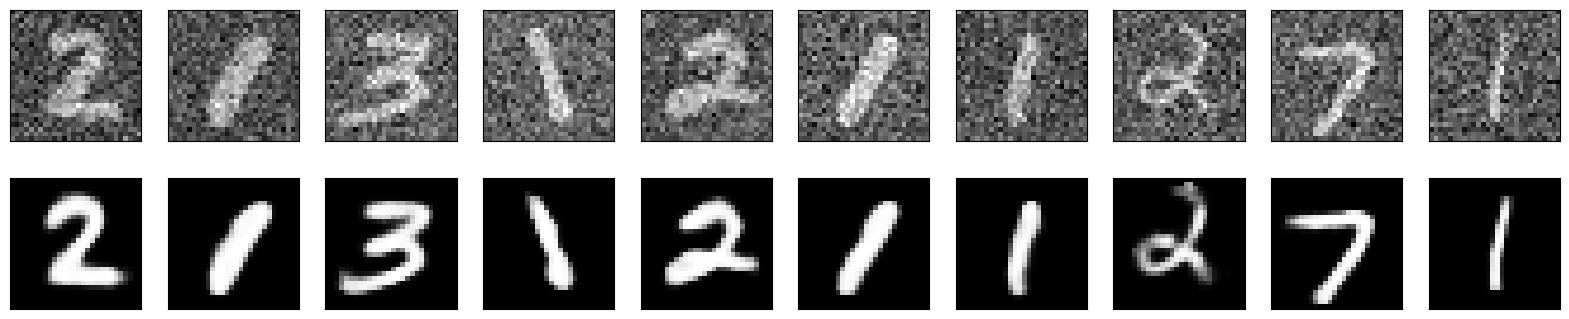

In [14]:
pred = model.predict(noisy_X_test)
display(noisy_X_test, pred)

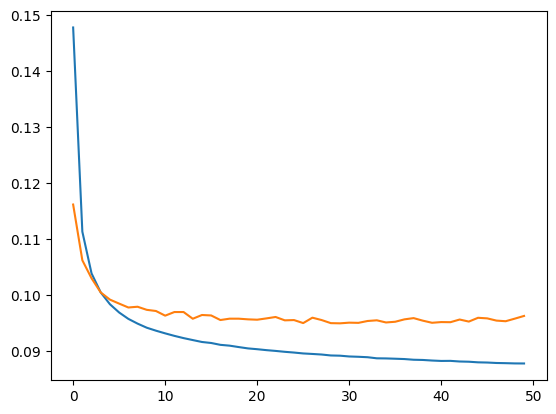

In [15]:
plt.plot(result.history['loss'])
plt.plot(result.history['val_loss'])

In [16]:
model.save("models/image_denoising_mnist.h5")